# State-space analyses

Written by Ladislas Nalborczyk (ladislas.nalborczyk@gmail.com). Last updated on July 22, 2024.

In [9]:
# if needed, un-installing the meeg_decoding moule
# ! yes | pip uninstall meeg_decoding

# installing the meeg_decoding and DSA modules from GitHub
# ! pip install git+https://github.com/lnalborczyk/meeg_decoding
# ! pip install git+https://github.com/mitchellostrow/DSA

# or, installing the meeg_decoding module from sup-directory
# ! pip install ../.

In [2]:
import mne
from meeg.latent import compare_pca_through_time, stats_trajectories
from meeg.plots import compare_neural_trajectories_2d, compare_neural_trajectories_3d, plot_neural_trajectories_2d_with_stats

/Users/ladislas/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
# importing the examplary MEG data (MNE epochs)
visual_4l2s = mne.read_epochs("../src/meeg/data/visual_4l2s-epo.fif")
visual_7l2s = mne.read_epochs("../src/meeg/data/visual_7l2s-epo.fif")

Reading /Users/ladislas/Desktop/meeg_decoding/examples/../src/meeg/data/visual_4l2s-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Adding metadata with 13 columns
160 matching events found
No baseline correction applied
0 projection items activated
Reading /Users/ladislas/Desktop/meeg_decoding/examples/../src/meeg/data/visual_7l2s-epo.fif ...
    Found the data of interest:
        t =    -200.00 ...     800.00 ms
        0 CTF compensation matrices available
Adding metadata with 13 columns
159 matching events found
No baseline correction applied
0 projection items activated


In [4]:
# computing average neural trajectories (and across-trial SD) in a common PCA space
epochs1_pca, epochs1_pca_std, epochs2_pca, epochs2_pca_std = compare_pca_through_time(visual_4l2s, visual_7l2s, n_components=10)

/Users/ladislas/opt/anaconda3/lib/python3.9/site-packages/meeg/latent/trajectories.py:81: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials1 = epochs1.get_data()
/Users/ladislas/opt/anaconda3/lib/python3.9/site-packages/meeg/latent/trajectories.py:82: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  trials2 = epochs2.get_data()


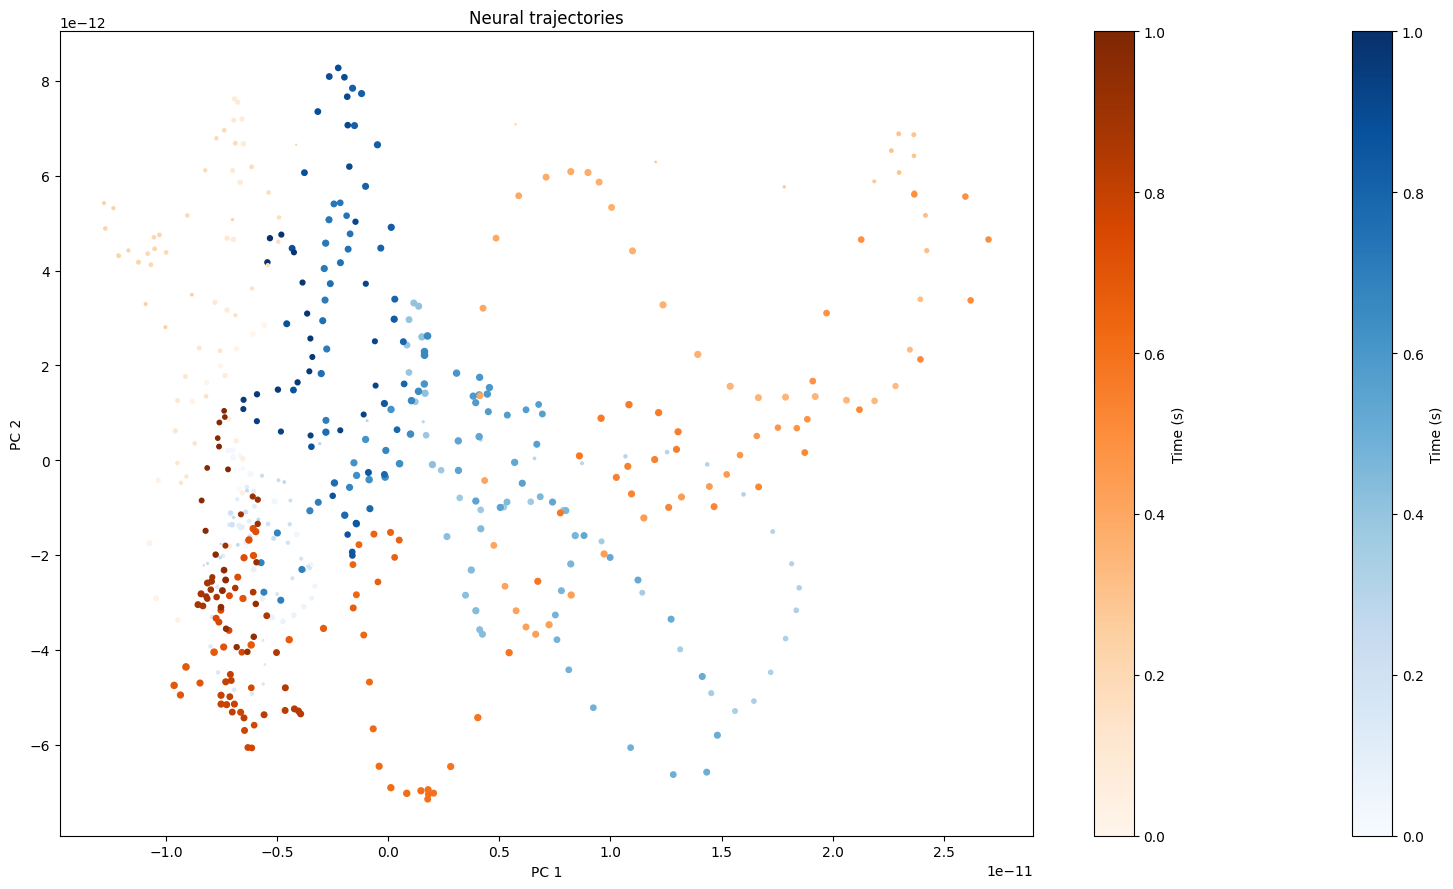

In [5]:
compare_neural_trajectories_2d(
    x_pca1=epochs1_pca, x_pca2=epochs2_pca,
    x_pca_std1=epochs1_pca_std, x_pca_std2=epochs2_pca_std,
    fs=1/250,
    plot_title="Neural trajectories"
    );

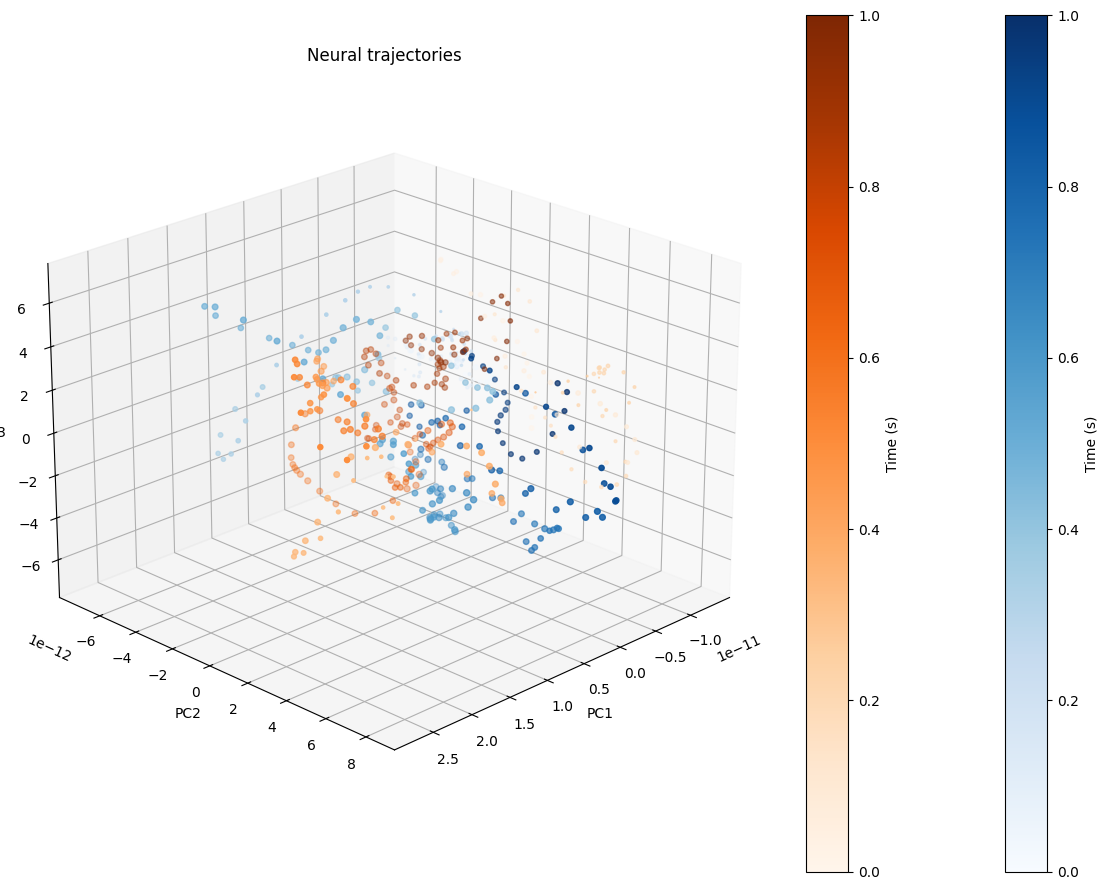

In [6]:
compare_neural_trajectories_3d(
    x_pca1=epochs1_pca, x_pca2=epochs2_pca,
    x_pca_std1=epochs1_pca_std, x_pca_std2=epochs2_pca_std,
    fs=1/250,
    plot_title="Neural trajectories"
    );

In [7]:
# computing mean, std, speed, and curvature of latent trajectory
pca_mean, pca_sd, speed, curvature = stats_trajectories(epochs=visual_4l2s, n_components=10)

# sanity check
print(pca_mean.shape, pca_sd.shape, speed.shape, curvature.shape)

Original shape of the MEG data: (160, 306, 251)
Length of the labels to be predicted: 160
PCA explained variance:0.700
(251, 10) (251,) (251,) (251,)


Original shape of the MEG data: (160, 306, 251)
Length of the labels to be predicted: 160
PCA explained variance:0.700
0
50


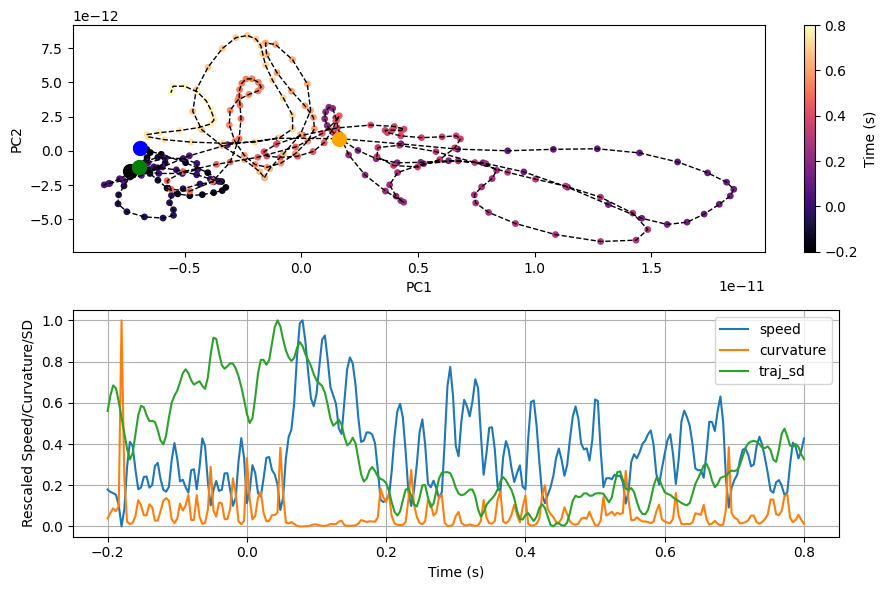

In [8]:
# visualising the timecourse of speed and curvature
plot_neural_trajectories_2d_with_stats(epochs=visual_4l2s, n_components=10);